# L07: Bayesian inference

**Sources and additional reading:**
- Ivezić, chapter 5
- Ariel Caticha: [Lectures on probability, entropy, and statistical physics](https://arxiv.org/abs/0808.0012)
- Press, Teukolsky, Vetterling & Flannery: Numerical Recipes - The Art of Scientific Computing, chapter 15
- Lupton, chapter 11
- image credit: https://www.reddit.com/r/AskStatistics/comments/79y6rl/is_the_maximum_a_posteriori_the_point_of_highest/

## A "derivation" of Bayes' Theorem

In L04, we used Bayes' Theorem and saw that it can become an inference method if interpreted in terms of a model $M$ with parameters $\theta$ and data $x$. In this interpretation, Bayes' Theorem states that $$P(\theta, M|x) = \frac{P(x|\theta, M)P(\theta, M)}{P(x)},$$ where $P(x|\theta, M)$ is the likelihood, $P(\theta, M)$ the prior, and $P(x)$ the evidence. We then used this theorem to derive the principle of maximum likelihood estimation, which is based on the assumption that the prior distirbution is constant, i.e. $P(\theta, M)=\mathrm{const.}$ and thus maximizing the posterior of a set of parameters $\theta$ is equivalent to maximizing the likelihood.

Here we would now like to take a step back and derive this theorem from an information-theoretical point-of-view. This should also help clarify the role of the prior, which is a central quantity in Bayesian inference.

The topics we've covered so far in probability theory and statistics have essentially given us a framework that allows to represent our state of knowledge about a given system. The next step is now to address the problem of updating this state of knowledge once new information in the form of data becomes available. 

To be more specific, we would like to update our beliefs about parameters $\theta$ of model $M$ on the basis of data $x$ and a known relation between $x$ and $\theta$. Formally, the update consists in updating the prior distribution $P(\theta, M)$ that represents our knowledge before processing the data to a new distribution $P_{\mathrm{new}}(\theta, M)$, which encodes additional information contained in the data.

Let us first describe our state of knowledge before data has been processed. At this stage, we do not know $\theta$ and $x$, but we do know how $x$ would look like if we knew $\theta$. This is the likelihood. So to describe our prior state of knowledge, we need to specify the joint distribution of $(x, \theta)$, i.e. both the likelihood and the prior on model parameters $$P(x, \theta)=P(x|\theta, M)P(\theta, M).$$

Now let us assume that we obtain data and the observation turns out to be $X$. We now want to use this information to obtain a new joint distribution $P_{\mathrm{new}}(x, \theta)$. From the data we know that $$P_{\mathrm{new}}(x)=\int\mathrm{d}\theta \; P_{\mathrm{new}}(x, \theta)=\delta(x-X).$$ This is essentially all the data tells us about $P_{\mathrm{new}}(x, \theta)$. In order to make progress we need a new principle.

The updating strategy that we adopt reflects the idea that prior knowledge is valuable and should only be updated if this is required by the new information. So we can adopt the following principle:

*Principle of minimal updating:* The state of knowledge needs to be updated only to the extent required by the data.

What does this mean practically? From above, we have that the new joint distribution is not fully determined by the data, i.e. we can write $$P_{\mathrm{new}}(x, \theta)=P_{\mathrm{new}}(x)P_{\mathrm{new}}(\theta, M|x)=\delta(x-X)P_{\mathrm{new}}(\theta, M|x),$$ for arbitrary $P_{\mathrm{new}}(\theta, M|x)$. So now we invoke the *principle of minimal updating* and postulate that $$P_{\mathrm{new}}(\theta, M|x)=P_{\mathrm{old}}(\theta, M|x)=P(\theta, M|x),$$ which leads to $P_{\mathrm{new}}(x, \theta)=\delta(x-X)P(\theta, M|x)$ and thus $$P_{\mathrm{new}}(\theta)=\int\mathrm{d}x\;P_{\mathrm{new}}(x, \theta) = P(\theta, M|X).$$ This shows that the posterior probability is the prior conditional probability of $\theta$ given $X$. This makes sense as we keep those beliefs about $\theta$ that are consistent with the new data and discard those that are not consistent. We can then use the product rul and write Bayes' Theorem in its usual form $$P_{\mathrm{new}}(\theta)=P(\theta, M|X) = \frac{P(X|\theta, M)P(\theta, M)}{P(X)},$$ but now we see that there is this one additional step needed, which is the principle of minimal updating.

The interpretation of Bayes' Theorem now becomes even more clear: the posterior distribution is determined by those values of $\theta$ that were previously preferred by the prior $P(\theta, M)$ but it is now modulated by the likelihood $P(X|\theta, M)$ which gives higher weight to those values of $\theta$ that make the observed data more likely.

Finally, the last term in Bayes' Theorem is the so-called *evidence*, which is given by $$P(X)=\int\mathrm{d}\theta P(X|\theta, M)P(\theta, M).$$ This is essentially the prior probability of the data (i.e. the prior predictive distribution for the data). Practically in the theorem it plays the role of a normalizing constant and thus is not important when deriving the posterior distribution of model parameters $\theta$. It becomes very important in Bayesian model selection though.

## Bayesian statistical inference

Bayes' Theorem essentially allows us to derive a posterior distribution from a prior and a likelihood. Once we have this distribution, we can compute quantities that characterize it. 

To this end, let us assume that we would like to update our knowledge about model parameters $\boldsymbol{\theta}$ based on data $\boldsymbol{x}$, i.e. our posterior is given by $$P(\boldsymbol{\theta}, M|\boldsymbol{x}) = \frac{P(\boldsymbol{x}|\boldsymbol{\theta}, M)P(\boldsymbol{\theta}, M)}{P(\boldsymbol{x})}.$$

Once we have the posterior, we can compute the expectation value of any function $\phi$ of $\boldsymbol{\theta}$ as $$\langle \phi \rangle = \int\mathrm{d}\boldsymbol{\theta}\; \phi(\boldsymbol{\theta}) P(\boldsymbol{\theta}, M|\boldsymbol{x}).$$ We can use this to derive a set of quantities that help us characterize the posterior distribution $P(\boldsymbol{\theta}, M|\boldsymbol{x})$. The most common quantities are the *posterior mean* and the *maximum a posteriori*.

*Posterior mean:* From the posterior we can compute the expectation value of $\boldsymbol{\theta}$, the so-called posterior mean, through $$\langle \boldsymbol{\theta}\rangle=\int\mathrm{d}\boldsymbol{\theta}\; \boldsymbol{\theta} P(\boldsymbol{\theta}, M|\boldsymbol{x}).$$

*Maximum a posteriori:* Another quantity of interest is the point where the posterior peaks (cf. MLE). If we are interested in the value of $\boldsymbol{\theta}$ with the higest posterior (i.e. the most probable parameter value), then we can compute the maximum a posteriori (MAP) estimate, defined as $$\hat{\boldsymbol{\theta}}_{\mathrm{MAP}}=\underset{\boldsymbol{\theta}}{\mathrm{argmax}} \; P(\boldsymbol{\theta}, M|\boldsymbol{x}).$$

Aside: As can be seen below, these two quantities are generally different, but for a Gaussian, they coincide.

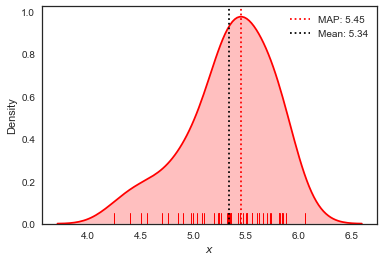

## Confidence intervals aka how to state our uncertainties

Once we have the full posterior, we can also extract more information from it, such as its second moments (variance) as well as the related *confidence limits* (or *credible limits*). The latter quantities allow us to assign uncertainties to our inference of a set of parameters $\boldsymbol{\theta}$. This concept is independent of Bayesin inference, but it becomes particularly straighforward once we have access to the full posterior.

For a univariate parameter $\theta$, we define the *confidence limit* at confidence level $1-\alpha$ as the region $[\theta_{\mathrm{min}}, \theta_{\mathrm{max}}]$ such that $$P(\theta_{\mathrm{min}}\leq\theta\leq\theta_{\mathrm{max}}) = \int_{\theta_{\mathrm{min}}}^{\theta_{\mathrm{max}}}\mathrm{d}\theta\; P(\theta|x) = 1-\alpha.$$ The interpretation of this is that the true value of $\theta$ lies within the interval $[\theta_{\mathrm{min}}, \theta_{\mathrm{max}}]$ with $95\%$ confidence. In general, we are free to choose $[\theta_{\mathrm{min}}, \theta_{\mathrm{max}}]$, but a few common choices are:

*One-sided confidence interval:* In some situations, we are for example only interested if a random variable is too small, but we don't mind if it is too large (an example would be quality control in a factory). In this case, we can compute a one-sided confidence interval defined as $$P(\theta\leq\theta_{\mathrm{max}}) = \int_{-\infty}^{\theta_{\mathrm{max}}}\mathrm{d}\theta\; P(\theta|x) = \alpha.$$ We have respective relations if we are mostly interested in a variable being too large.

*Two-sided confidence interval:* When stating uncertainties we are often equally interested in positive and negative deviations from a given central value $\theta_0$, and so we can define a two-sided confidence interval $$P(\theta_{0}-\Delta\leq\theta\leq\theta_{0}+\Delta) = \int_{\theta_{0}-\Delta}^{\theta_{0}+\Delta}\mathrm{d}\theta\; P(\theta|x) = 1-\alpha.$$

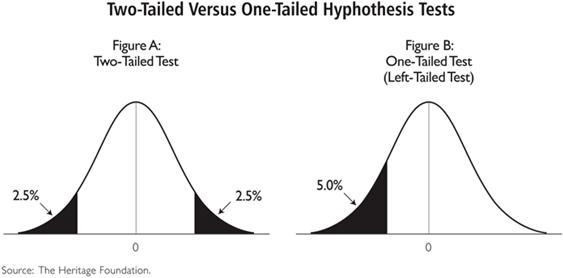

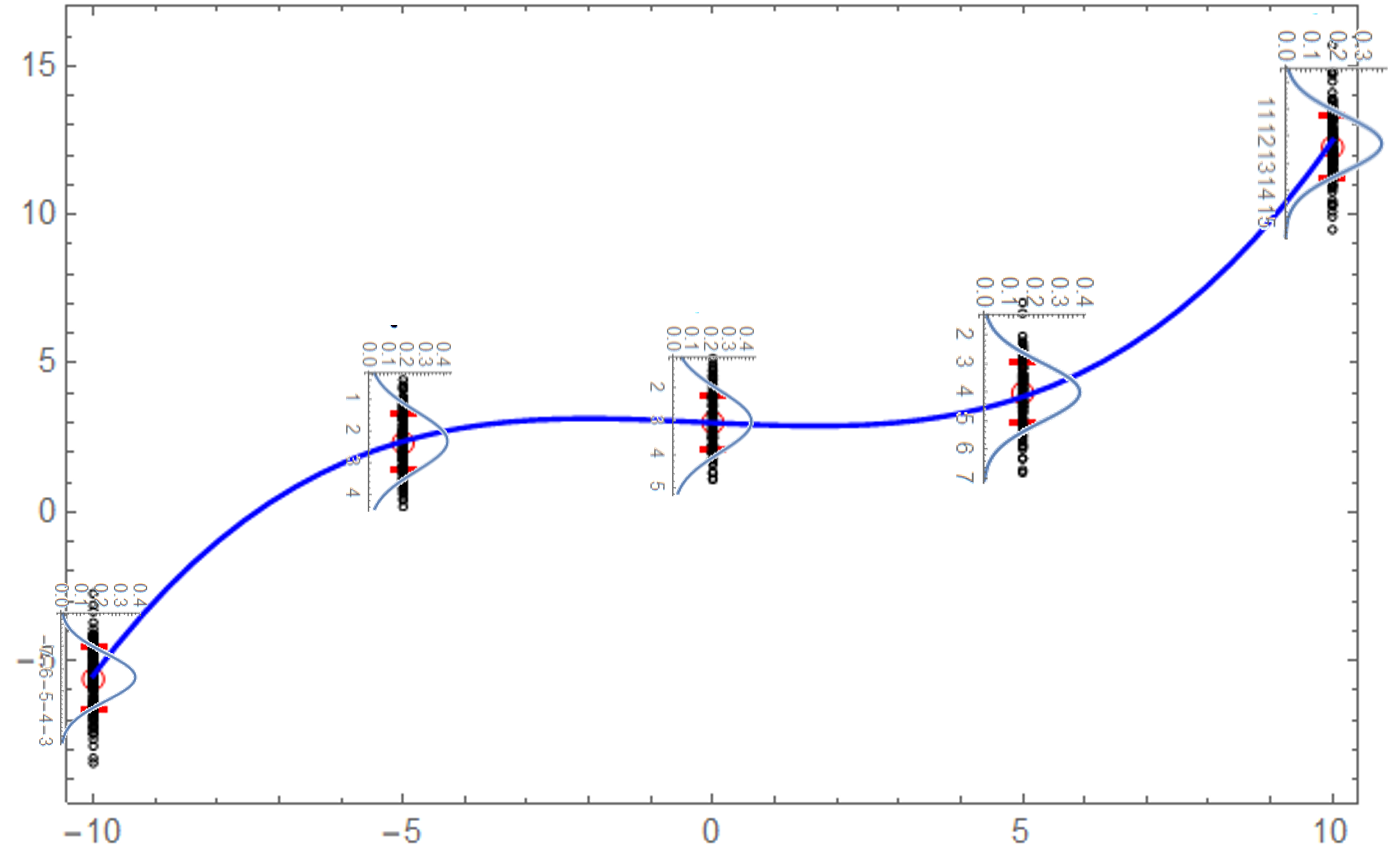

<font color='pink'>[AN: cls are approximations to pdfs]</font>

## Marginalization, conditioning and all that

So far we have been discussing how to give confidence limits for a given estimated parameter. The issue is that we very often deal with multidimenional and not univariate posteriors. So how shall we go about giving uncertainties in this case?

We essentially have two approaches: (i) we can generalize the concept of confidence interval to multidimensional spaces. This is particularly useful in 2D as we can still visualize it, or (ii) we can derive univariate distributions for each parameter and give confidence limits on those.

Let us focus on (ii) first. Let us assume that we have derived the posterior $P(\boldsymbol{\theta}, M|\boldsymbol{x})$, but we are actually only interested in the uncertainty on the parameter $\theta_i$. We can derive a probability distribution for $\theta_i$ by marginalizing out all other parameters from the joint distribution, i.e. $$P(\theta_i)=\int\mathrm{d}\theta_1...\mathrm{d}\theta_{i-1}\mathrm{d}\theta_{i+1}...\mathrm{d}\theta_n \; P(\boldsymbol{\theta}, M|\boldsymbol{x}).$$ We can interpret this quantity as the distribution of $\theta_i$ if we don't care about any of the other parameters. As we have integrated them out, the uncertainties on these parameters are implicitly taken into account. This is called *marginalization*. We can then use this marginalized distirbution $P(\theta_i)$ to compute corresponding one-dimensional uncertainties or CLs for $\theta_i$, these are called *marginalized*.

It is important to distinguish marginalized distributions from conditional distributions. A conditional distribution for $\theta_i$ can be obtained by fixing all other parameters $\theta_1...\theta_{i-1}\theta_{i+1}...\theta_n$ to a set of fiducial values (e.g. their best-fit). In this case, their uncertainties are not taken into account.

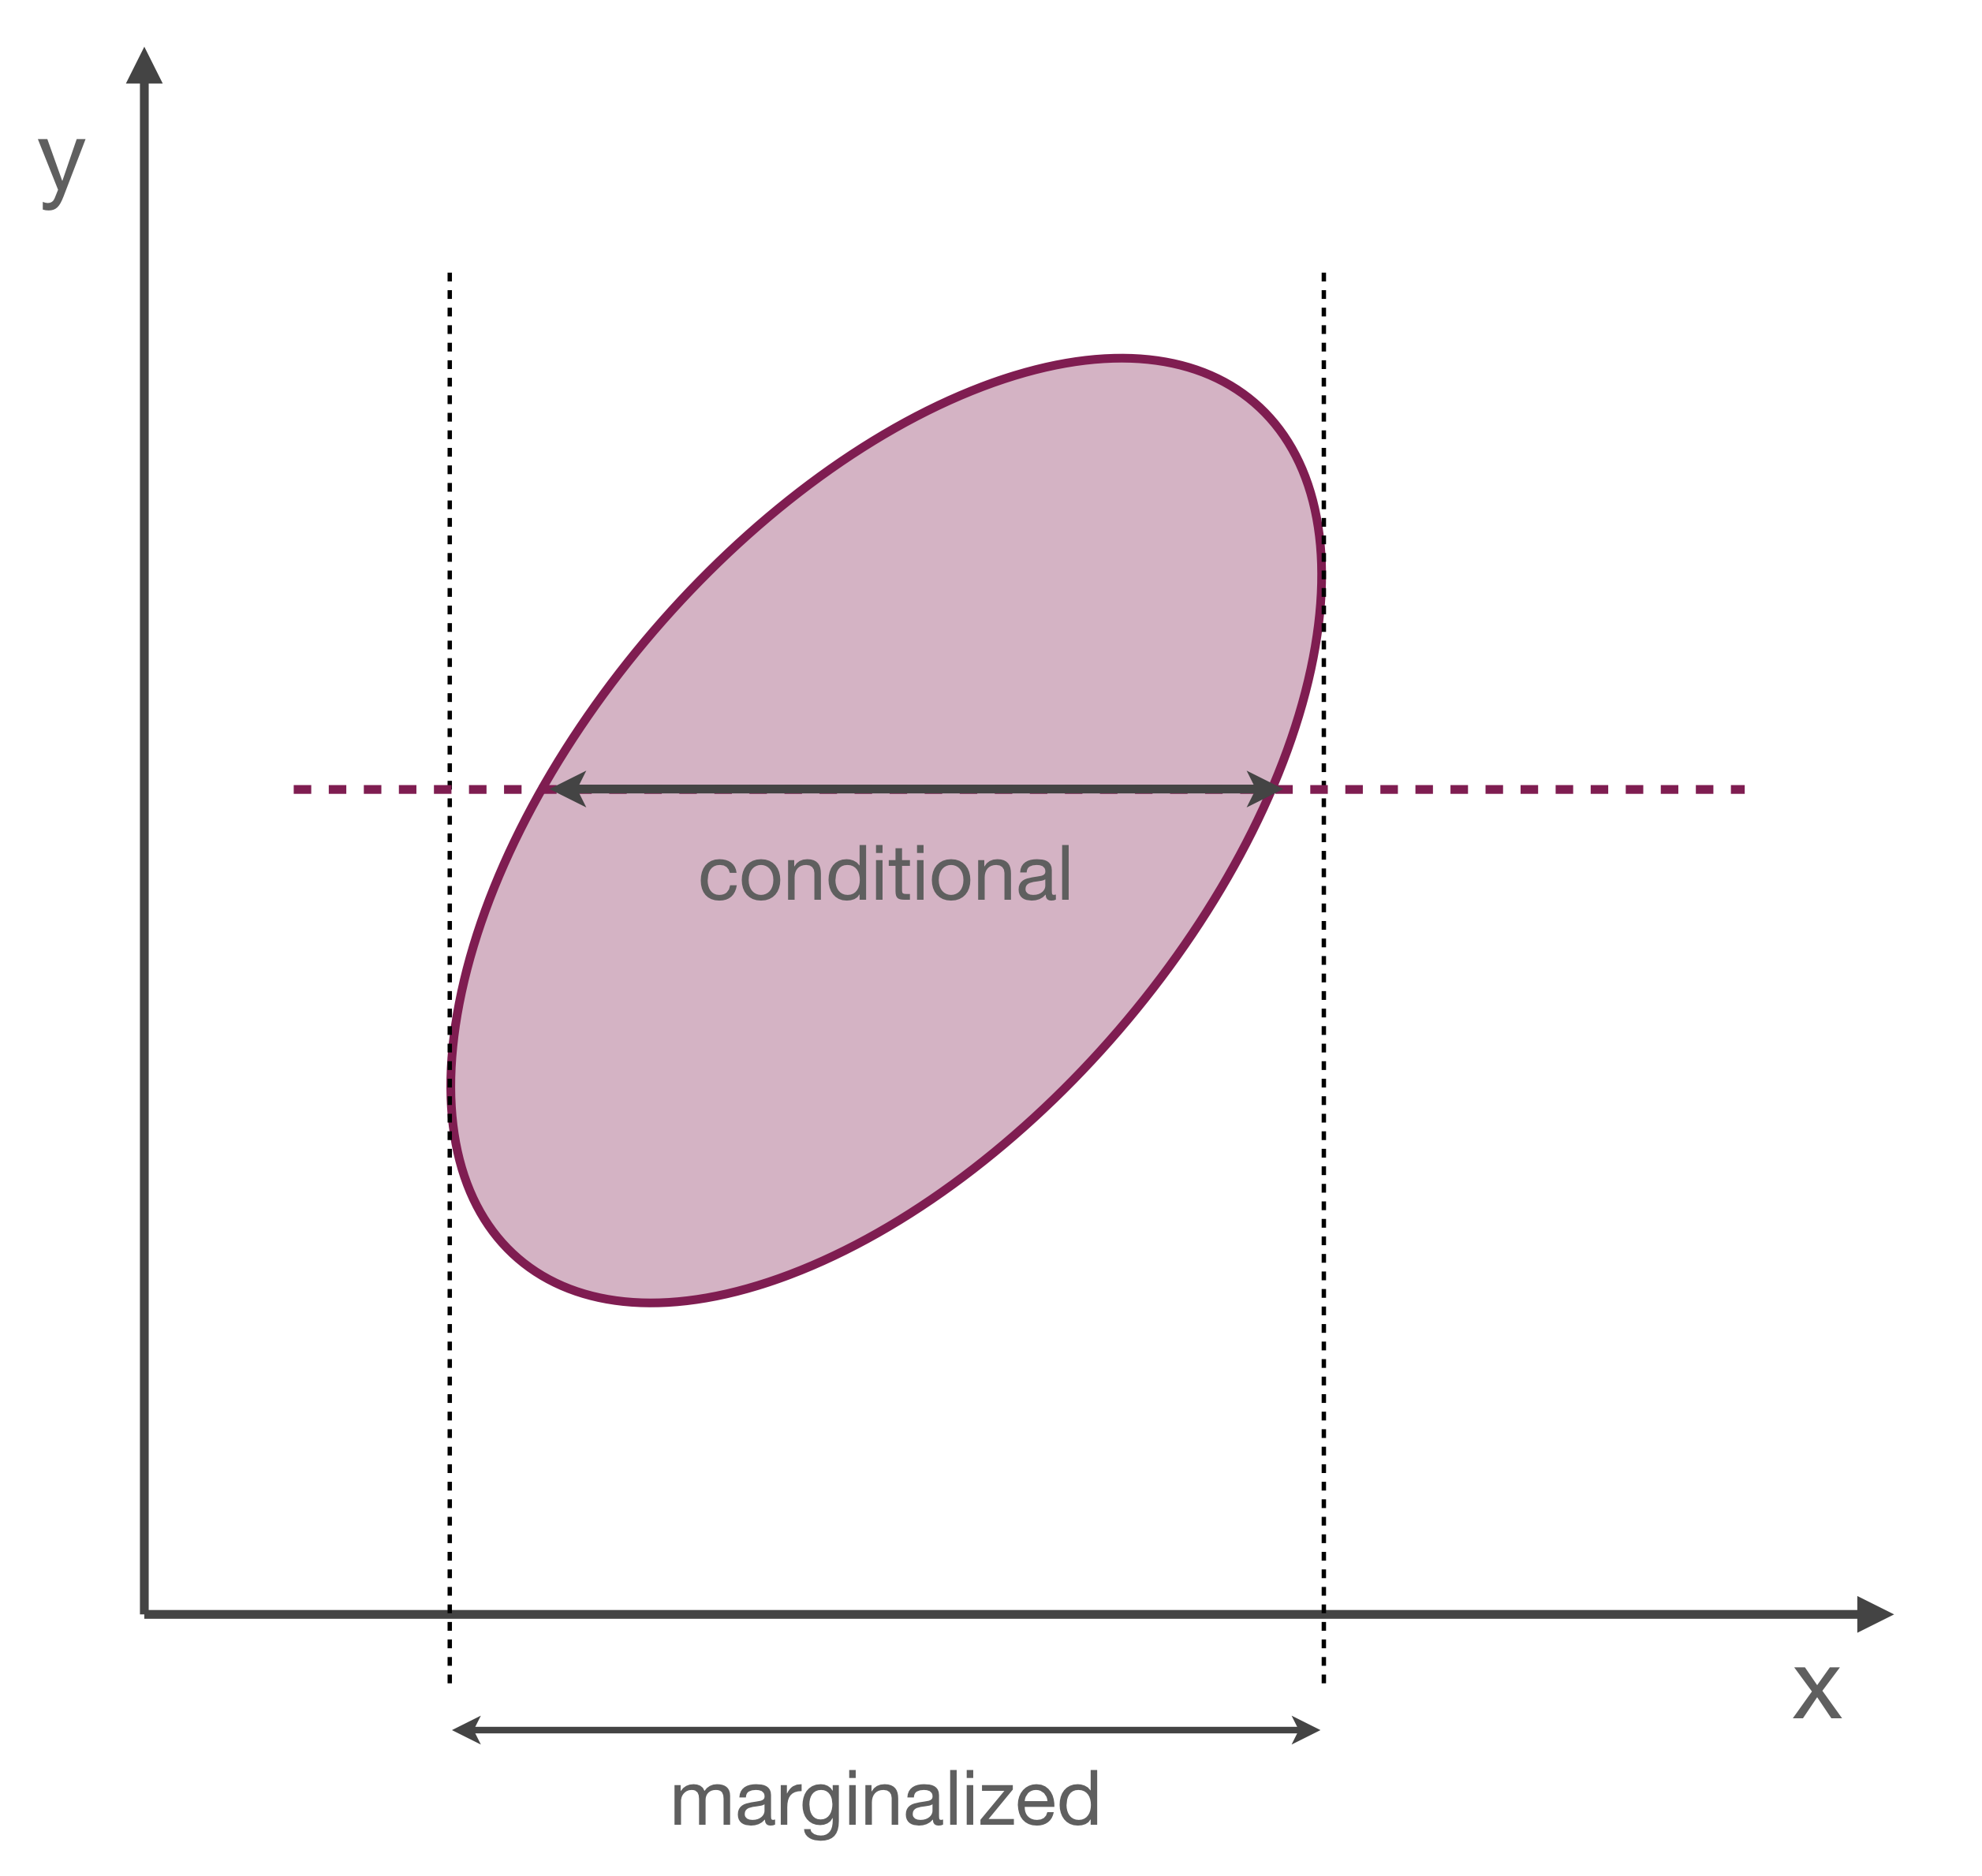

## Confidence contours 

Above we have defined confidence limits in 1D. Here we would like to generalize this notion to higher dimensional confidence regions, in particular we will focus on 2D as this is what we can easily visualize. 

Let us assume, we have performed a Bayesian inference analysis and have determined the MAP, which is an $n$-dimensional vector. Then there is a is a natural choice for the confidence regions. At $\boldsymbol{\theta}=\hat{\boldsymbol{\theta}}_{\mathrm{MAP}}$, the posterior is maximized, i.e. if we perturb $\boldsymbol{\theta}$ away from $\hat{\boldsymbol{\theta}}_{\mathrm{MAP}}$ in any direction, the posterior will decrease. The region within which the posterior does not decrease by more than $\Delta p$ defines an $n$-dimensional confidence region around $\hat{\boldsymbol{\theta}}_{\mathrm{MAP}}$. We can choose this threshold such that the region contains $68.3, 95.5, 99.7 \%$ of the probability distribution of $\boldsymbol{\theta}$. The regions determined in this way then form the confidence regions at significance $1-\alpha$ for the parameters $\theta$ in $n$ dimensions. Practically, we are mostly interested in $n=2$.

Computing these confidence contours thus amounts to computing the thresholds for a given probability and then the bounding regions. In the case of a Gaussian likelihood, flat prior, and a linear model, the posterior is also Gaussian and this procedure can be treated analytically:

Let us assume that we have a data vector $\boldsymbol{d}$ of size $m$, and we use it to fit a model with $n$ free parameters, $\boldsymbol{\theta}=(\theta_1,\cdots,\theta_n)$. In the case of Gaussian data, flat prior and a model linear in the parameters, maximizing the posterior is equivalent to minimizing the $\chi^2$. Its minimum value is denoted by $\chi^2_{\mathrm{min}}$, and it is attained for $\hat{\boldsymbol{\theta}}_{\mathrm{MAP}}$. Let us perform a Taylor expansion of the $\chi^2$ value around $\hat{\boldsymbol{\theta}}_{\mathrm{MAP}}$, i.e. $$\chi^2=\chi^2_{\mathrm{min}}+(\boldsymbol{\theta}-\hat{\boldsymbol{\theta}}_{\mathrm{MAP}})^\mathrm{T}\frac{1}{2}\frac{\partial^2\chi^2}{\partial \boldsymbol{\theta}\partial \boldsymbol{\theta}}(\boldsymbol{\theta}-\hat{\boldsymbol{\theta}}_{\mathrm{MAP}}).$$ We can now define the quantity $$\Delta \chi^2(\boldsymbol{\theta})=(\boldsymbol{\theta}-\hat{\boldsymbol{\theta}}_{\mathrm{MAP}})^\mathrm{T}\frac{1}{2}\frac{\partial^2\chi^2}{\partial \boldsymbol{\theta}\partial \boldsymbol{\theta}}(\boldsymbol{\theta}-\hat{\boldsymbol{\theta}}_{\mathrm{MAP}})=\chi^2(\boldsymbol{\theta})-\chi^2_{\mathrm{min}},$$ evaluated for the observed data $\boldsymbol{d}$. We can see that $\chi^2_{\mathrm{min}}$ is distributed as a $\chi^2$ variable with $m-n$ degrees-of-freedom, while $\chi^2$ has $m$ degrees-of-freedom. Therefore, $\Delta \chi^2$ is distributed as a $\chi^2$ variable with $n$ degrees-of-freedom. Confidence contours are levels of fixed probability, and thus $\Delta \chi^2$. Therefore, if we are interested in the confidence ellipsoid for an $n$-dimensional parameter vector at significance $1-\alpha$ we just need to determine the value of $\Delta \chi^2_{n, \mathrm{crit}}$ such that $$1-\alpha = \int_0^{\Delta\chi^2_{n, \mathrm{crit}}}\mathrm{d}\chi_n^2 \; P(\chi_n^2),$$ and plot the corresponding contour.

Often, we are interested in only a subset of the $n$ model parameters, $r=2$ being a natural choice. In order to obtain contour levels for a subset of the parameters, we can think of starting from the $\Delta \chi^2$ defined above (i.e. the full posterior for all model parameters), and then marginalizing out the $n-r$ parameter we are not interested in. The corresponding $\Delta \chi^2_r$ is given by $$\Delta \chi^2_r=(\boldsymbol{\theta}_r-\hat{\boldsymbol{\theta}}_{r, \mathrm{MAP}})^\mathrm{T}\frac{1}{2}\frac{\partial^2\chi^2_r}{\partial \boldsymbol{\theta}_r\partial \boldsymbol{\theta}_r}(\boldsymbol{\theta}_r-\hat{\boldsymbol{\theta}}_{r, \mathrm{MAP}}),$$ and will be distributed as a $\chi^2$ variable with $r$ degrees-of-freedom. Note that this is equivalent to setting $\theta_i=\hat{\theta}_{i, \mathrm{MAP}}$ for $i \in \{r+1,\cdots,n\}$ and considering $\Delta \chi^2_r(\boldsymbol{\theta}_r)=\chi^2_r(\boldsymbol{\theta}_r)-\chi^2_{\mathrm{min}}$.

### A note on sigmas

Let us consider a 2D standard normal distribution, i.e. $\mathcal{N}(x, y) = \frac{1}{2\pi}e^{-\frac{x^2+y^2}{2}}$. Then we can compute the probability that $x^2+y^2\leq r$ as $$\int \mathrm{d}x\mathrm{d}y \; \frac{1}{2\pi}e^{-\frac{x^2+y^2}{2}} = \int_0^r\mathrm{d}r'\;r' e^{-\frac{r'^2}{2}}=1-e^{-\frac{r}{2}}.$$ This the nominal $1\sigma$ region obtained for $r=1$ only includes $39.3\%$ of the probability. To obtain our usual $68.3\%$, we need to choose $\Delta \chi^2=2.3$.

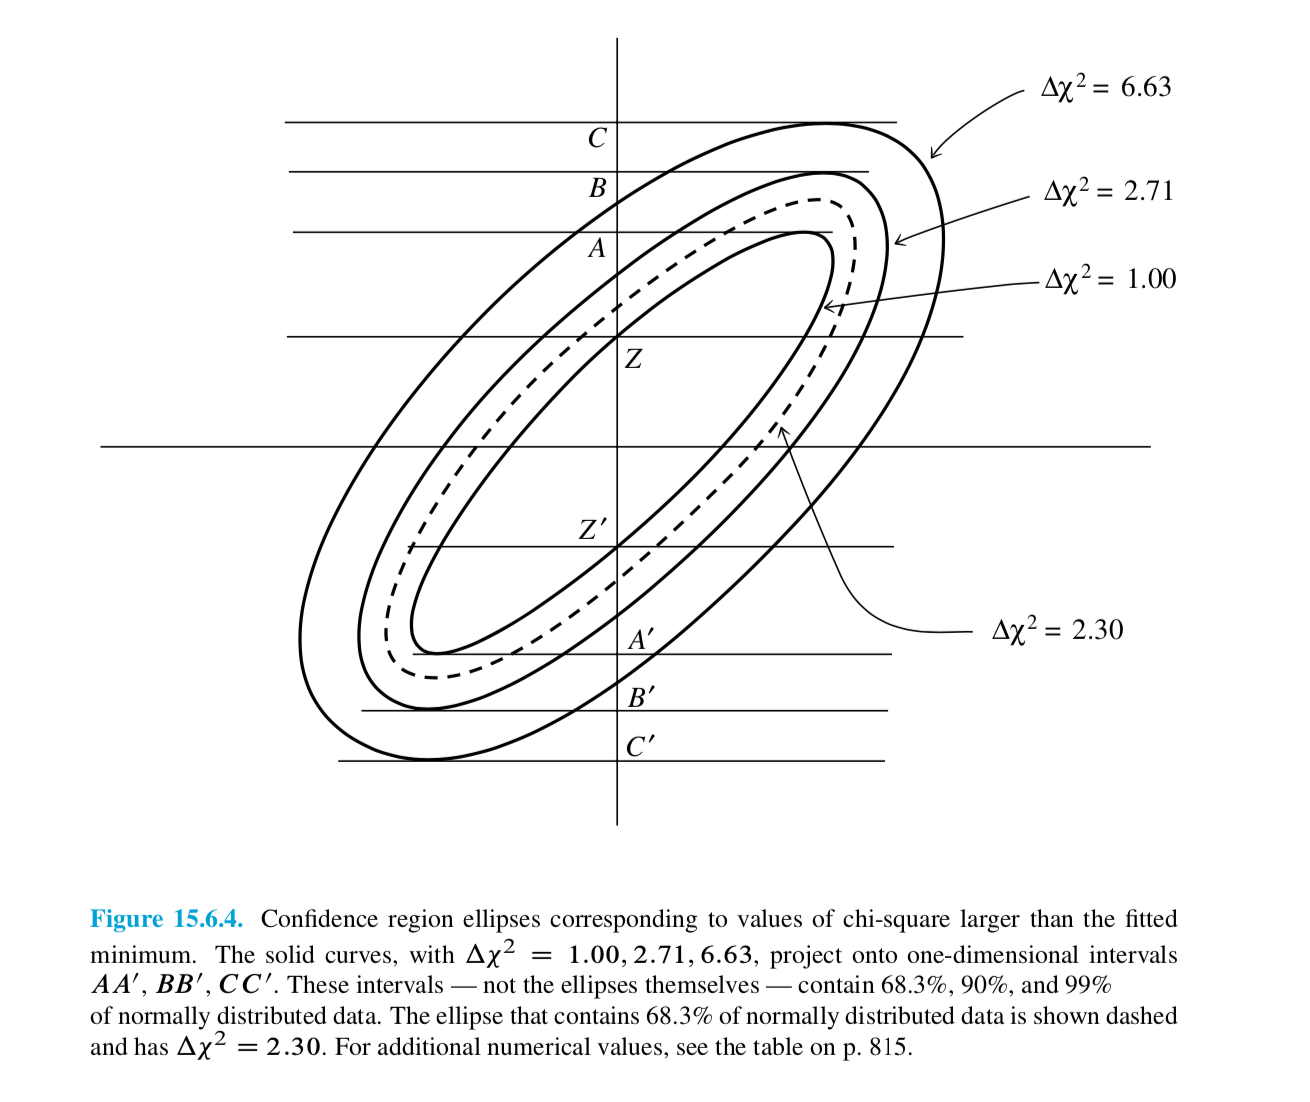